In [1]:
import pandas as pd
import numpy as np
import random
import gensim.downloader
import matplotlib.pyplot as plt

In [2]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
data = pd.read_csv('synonyms.csv', delimeter=",",header=0)
data

,question,answer,0,1,2,3
0,enormously,tremendously,appropriately,uniquely,tremendously,decidedly
1,provisions,stipulations,stipulations,interrelations,jurisdictions,interpretations
2,haphazardly,randomly,dangerously,densely,randomly,linearly
3,prominent,conspicuous,battered,ancient,mysterious,conspicuous
4,zenith,pinnacle,completion,pinnacle,outset,decline
...,...,...,...,...,...,...
75,fashion,manner,ration,fathom,craze,manner
76,marketed,sold,frozen,sold,sweetened,diluted
77,bigger,larger,steadier,closer,larger,better
78,roots,origins,origins,rituals,cure,function


In [4]:
models = ['word2vec-google-news-300', 
          'glove-wiki-gigaword-300', 'fasttext-wiki-news-subwords-300',
          'glove-twitter-200', 'glove-twitter-100']
performances = {model:[] for model in models}
for model in models:
    word2vec = gensim.downloader.load(model)
    L_pred = []
    for row in data.iterrows():
        if row[1]["question"] in word2vec.key_to_index and row[1]["answer"] in word2vec.key_to_index:
            prediction = []
            if row[1]["0"] in word2vec.key_to_index:
                prediction.append([row[1]['0'], word2vec.similarity(row[1]['0'], row[1]['question'])]) 

            if row[1]["1"] in word2vec.key_to_index:
                prediction.append([row[1]['1'], word2vec.similarity(row[1]['1'], row[1]['question'])])

            if row[1]["2"] in word2vec.key_to_index:
                prediction.append([row[1]['2'], word2vec.similarity(row[1]['2'], row[1]['question'])])

            if row[1]["3"] in word2vec.key_to_index:
                prediction.append([row[1]['3'], word2vec.similarity(row[1]['3'], row[1]['question'])])

            if len(prediction)!=0:
                guess = max(prediction, key=lambda x: x[1])
                if guess[0] == row[1]["answer"]:
                    label='correct'
                else:
                    label='wrong'
            else:
                label = 'guess'
                guess = [row[1][str(np.random.randint(0,4))]]

        else:
            label = 'guess'
            guess = [row[1][str(np.random.randint(0,4))]]
        s = F"{row[1]['question']},{row[1]['answer']},{guess[0]},{label}"
        L_pred.append(s)
    performances[model] = L_pred


In [5]:
for model in models:
    with open(f"{model}-details.csv",'w') as f:
        for pred in performances[model]:
            f.write(pred+'\n')

In [6]:
performances = {model:0 for model in models}
for i, model in enumerate(models):
    L_pred = []
    with open(f"{model}-details.csv",'r') as f:
        for line in f.readlines():
            L_pred.append(line.split(','))
            L_pred[-1][-1] = L_pred[-1][-1].rstrip("\n")
    C = list(map(lambda x:x[-1],L_pred)).count("correct")
    V = list(map(lambda x:x[-1],L_pred)).count("wrong") + C
    performances[model] = C/V
    if i==0:
        with open("analysis.csv", "w") as f:
            f.write(f"{model},{len(word2vec.key_to_index)},{C},{V},{C/V}\n")
            print(f"{model},{len(word2vec.key_to_index)},{C},{V},{C/V}")
    else:
        with open("analysis.csv", "a") as f:
            f.write(f"{model},{len(word2vec.key_to_index)},{C},{V},{C/V}\n")
            print(f"{model},{len(word2vec.key_to_index)},{C},{V},{C/V}")
        


word2vec-google-news-300,1193514,70,79,0.8860759493670886
glove-wiki-gigaword-300,1193514,71,79,0.8987341772151899
fasttext-wiki-news-subwords-300,1193514,74,80,0.925
glove-twitter-200,1193514,44,77,0.5714285714285714
glove-twitter-100,1193514,39,77,0.5064935064935064


In [7]:
random.seed(0)
L_pred = list()
for row in data.iterrows():
    random_pred = row[1][str(random.randint(1,3))]
    if random_pred == row[1]["answer"]:
        label='correct'
    else:
        label='wrong'
    s = F"{row[1]['question']},{row[1]['answer']},{random_pred},{label}"
    L_pred.append(s)

with open(f"random-baseline-details.csv",'w') as f:
    for pred in L_pred:
        f.write(pred+'\n')
        print(pred)

enormously,tremendously,tremendously,correct
provisions,stipulations,jurisdictions,wrong
haphazardly,randomly,densely,wrong
prominent,conspicuous,mysterious,wrong
zenith,pinnacle,decline,wrong
flawed,imperfect,lustrous,wrong
urgently,desperately,tentatively,wrong
consumed,eaten,eaten,correct
advent,coming,financing,wrong
concisely,succinctly,freely,wrong
salutes,greetings,privileges,wrong
solitary,alone,restless,wrong
hasten,accelerate,accompany,wrong
perseverance,endurance,skill,wrong
fanciful,imaginative,apparent,wrong
showed,demonstrated,published,wrong
constantly,continually,continually,correct
issues,subjects,benefits,wrong
furnish,supply,protect,wrong
costly,expensive,complicated,wrong
recognized,acknowledged,welcomed,wrong
spot,location,location,correct
make,earn,print,wrong
often,frequently,chemically,wrong
easygoing,relaxed,boring,wrong
debate,argument,competition,wrong
narrow,thin,freezing,wrong
arranged,planned,discarded,wrong
infinite,limitless,unusual,wrong
showy,striking,

In [8]:
with open(f"random-baseline-details.csv",'r') as f:
    for line in f.readlines():
        L_pred.append(line.split(','))
        L_pred[-1][-1] = L_pred[-1][-1].rstrip("\n")
C = list(map(lambda x:x[-1],L_pred)).count("correct")
V = list(map(lambda x:x[-1],L_pred)).count("wrong") + C
performances['random-baseline'] = C/V
performances['human-gold-standard'] = 0.8557
performances

{'word2vec-google-news-300': 0.8860759493670886,
 'glove-wiki-gigaword-300': 0.8987341772151899,
 'fasttext-wiki-news-subwords-300': 0.925,
 'glove-twitter-200': 0.5714285714285714,
 'glove-twitter-100': 0.5064935064935064,
 'random-baseline': 0.2875,
 'human-gold-standard': 0.8557}

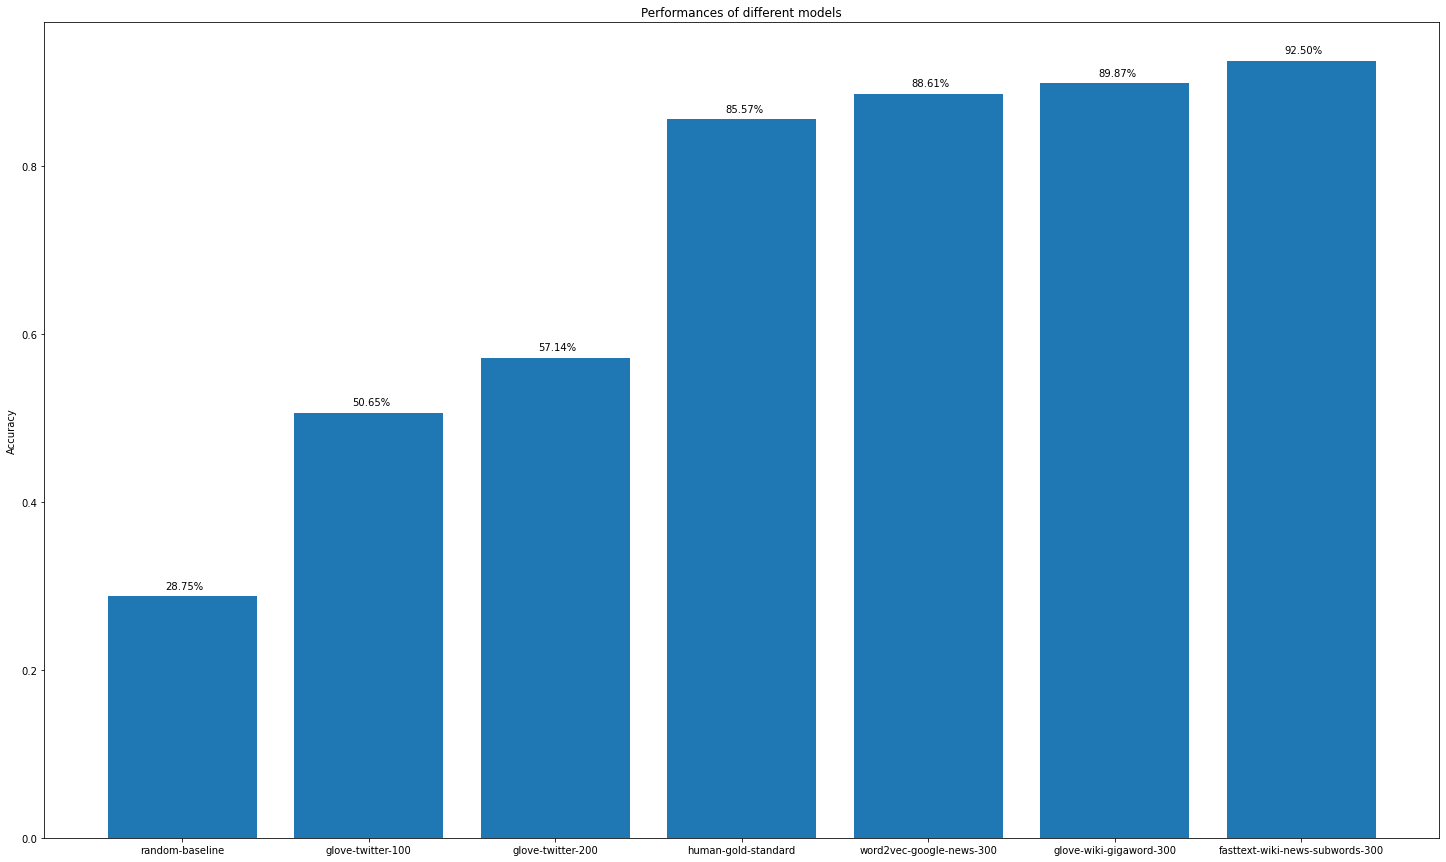

In [9]:
sorted_performances = dict(sorted(performances.items(), key=lambda item: item[1]))
t = np.arange(len(sorted_performances))
plt.figure(figsize=(25,15))
plt.bar(t,sorted_performances.values(),align='center')
plt.xticks(t,list(sorted_performances.keys()))
for index,data_plot in enumerate(list(sorted_performances.values())):
    plt.text(x=index-0.09 , y =data_plot+0.009 , s="{:.2f}%".format(data_plot*100) , fontdict=dict(fontsize=10))
plt.title('Performances of different models')
plt.ylabel('Accuracy')
plt.savefig('performances.pdf')
plt.show()